<a href="https://colab.research.google.com/github/Anmol-OS/KNN-Classification-on-Sickle-Crops-Dataset/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUMMER INTERNSHIP 2025**
# MINI PROJECT (WEEK-2)
# **CREATED BY:**
# Anmol Bhatnagar             (992401040039)


# **INITIAL DATA EXAMINATION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

Importing libraries:

*   pandas is used to load and manipulate datasets
*   numpy supports mathematical operations
*   seaborn and matplotlib help in making graphs and visualizations






In [ ]:
df = pd.read_csv("/content/metadata.csv")
print("Shape of the dataset:", df.shape)
df.head(10)

Shape of the dataset: (217, 17)


,UNIQUE_ID,PLOT_ID,RIVER_PART,STANDARD_SEASON,YEAR,AREA,CROP,VARIETY,PADDY_BIN,SOWING_DATE,TRANSPLANTING_DATE,HARVESTING_DATE,SOWING_DAY,TRANSPLANTING_DAY,HARVESTING_DAY,YIELD,SPLIT
0,2315,417.0,NaN,oct-mar,2020.0,1.00,Paddy,Kalser,1.0,10/3/2020,11/3/2020,2/13/2021,3.0,34.0,136.0,1320.0,train
1,1774,219.0,Coastal Cauvery,dec-may,2019.0,0.09,Paddy,NaN,1.0,1/1/2020,0,5/31/2020,32.0,0.0,183.0,0.0,val
2,1592,195.0,Lower Cauvery,apr-aug,2020.0,0.34,Paddy,NaN,1.0,4/1/2020,0,7/31/2020,1.0,0.0,122.0,0.0,train
3,1253,161.0,Upper Cauvery,aug-jan,2019.0,0.19,Sugarcane,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
4,1685,211.0,Coastal Cauvery,oct-mar,2018.0,4.11,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,val
5,1992,243.0,Coastal Cauvery,aug-jan,2019.0,0.06,Paddy,NaN,1.0,9/1/2019,0,12/31/2019,32.0,0.0,153.0,0.0,train
6,532,57.0,Middle Vennar,jun-oct,2018.0,0.11,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,val
7,1104,148.0,Upper Cauvery,sep-feb,2019.0,0.06,Banana,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
8,2257,389.0,NaN,sep-feb,2019.0,1.00,Paddy,Kalsar,1.0,9/9/2019,10/10/2019,1/26/2020,9.0,40.0,148.0,1280.0,train
9,1924,236.0,Coastal Cauvery,dec-may,2020.0,0.07,Groundnut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train


In [ ]:
df.columns

Index(['UNIQUE_ID', 'PLOT_ID', 'RIVER_PART', 'STANDARD_SEASON', 'YEAR', 'AREA',
       'CROP', 'VARIETY', 'PADDY_BIN', 'SOWING_DATE', 'TRANSPLANTING_DATE',
       'HARVESTING_DATE', 'SOWING_DAY', 'TRANSPLANTING_DAY', 'HARVESTING_DAY',
       'YIELD', 'SPLIT'],
      dtype='object')

 Loading the CSV file containing the dataset using pandas.


*   .shape tells how many rows (samples) and columns (features) are present.
*   .head() shows the first few rows to understand what kind of data the dataset contains.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UNIQUE_ID           217 non-null    int64  
 1   PLOT_ID             217 non-null    float64
 2   RIVER_PART          183 non-null    object 
 3   STANDARD_SEASON     217 non-null    object 
 4   YEAR                217 non-null    float64
 5   AREA                217 non-null    float64
 6   CROP                217 non-null    object 
 7   VARIETY             34 non-null     object 
 8   PADDY_BIN           217 non-null    float64
 9   SOWING_DATE         217 non-null    object 
 10  TRANSPLANTING_DATE  217 non-null    object 
 11  HARVESTING_DATE     217 non-null    object 
 12  SOWING_DAY          217 non-null    float64
 13  TRANSPLANTING_DAY   217 non-null    float64
 14  HARVESTING_DAY      217 non-null    float64
 15  YIELD               217 non-null    float64
 16  SPLIT   

Before the application of KNN algorithm or any other machine learning algorithms, .info() helps in:


*   What type of data each column has (e.g., numbers, text, dates)

*   How many non-null (non-missing) values there are

*   If any columns might need type conversion (like date fields stored as text)





In [ ]:
df.describe()

,UNIQUE_ID,PLOT_ID,YEAR,AREA,PADDY_BIN,SOWING_DAY,TRANSPLANTING_DAY,HARVESTING_DAY,YIELD
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1227.285714,167.253456,2019.110599,0.374470,1.589862,4.382488,6.059908,60.635945,283.102903
std,708.129070,116.405125,0.791581,0.488447,0.492996,9.987783,14.535433,74.084294,686.963508
min,29.000000,2.000000,2018.000000,0.020000,1.000000,-23.000000,0.000000,0.000000,0.000000
25%,573.000000,62.000000,2018.000000,0.130000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1295.000000,165.000000,2019.000000,0.210000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1856.000000,229.000000,2020.000000,0.430000,2.000000,1.000000,0.000000,142.000000,0.000000
max,2400.000000,444.000000,2020.000000,4.110000,2.000000,34.000000,69.000000,184.000000,3600.000000


This gives summary statistics for numeric features like:

*   Mean, median, min, max
*   Standard deviation (how much values vary)



In [ ]:
df.isnull().sum()

,0
UNIQUE_ID,0
PLOT_ID,0
RIVER_PART,34
STANDARD_SEASON,0
YEAR,0
AREA,0
CROP,0
VARIETY,183
PADDY_BIN,0
SOWING_DATE,0


Checking for missing data.

There exists few data points with missing values(here, River part and variety have 34 and 183 missing values)

# **CLEANING DATA**

In [ ]:
# Remove dropna() as it removes all rows
# df.dropna(inplace=True)

# Impute missing values in 'RIVER_PART' with the mode
if not df['RIVER_PART'].isnull().all():
  df['RIVER_PART'].fillna(df['RIVER_PART'].mode()[0], inplace=True)

# Drop the 'VARIETY' column due to a high percentage of missing values
if 'VARIETY' in df.columns:
  df.drop('VARIETY', axis=1, inplace=True)

df.drop_duplicates(inplace=True)
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (0, 17)


The dataset becomes clean and ready for analysis by removing:


*   Rows with missing data using .drapna()
*   Duplicate rows that could bias the model using drop_duplicates()


The shape changes (usually fewer rows), which confirms cleanup was successful.

In [ ]:
df['CROP'] = df['CROP'].str.strip().str.upper()


In [ ]:
df['CROP'] = df['CROP'].astype(str).str.strip().str.upper()


These functions ensure that the CROP column has normalised values.

# **Data Exploration**

In [ ]:
df['CROP'].value_counts()


,count
CROP,


This tells if the dataset is skewed towards one type of crop (e.g., mostly Paddy), which may affect how well the model performs on smaller classes.

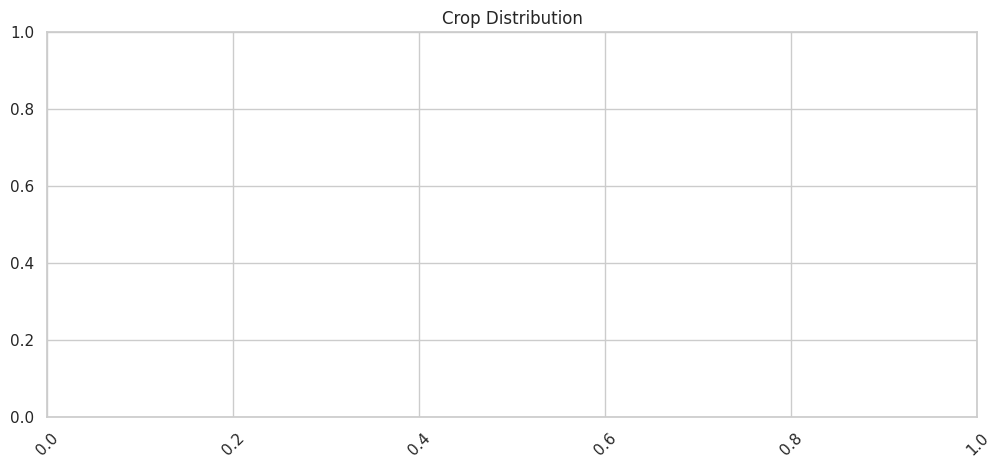

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='CROP')
plt.title("Crop Distribution")
plt.xticks(rotation=45)
plt.show()

This bar chart helps to visualize if there is an imbalance in the dataset.

For eg. Paddy occurs more than other crops.

**VISUALIZATION**

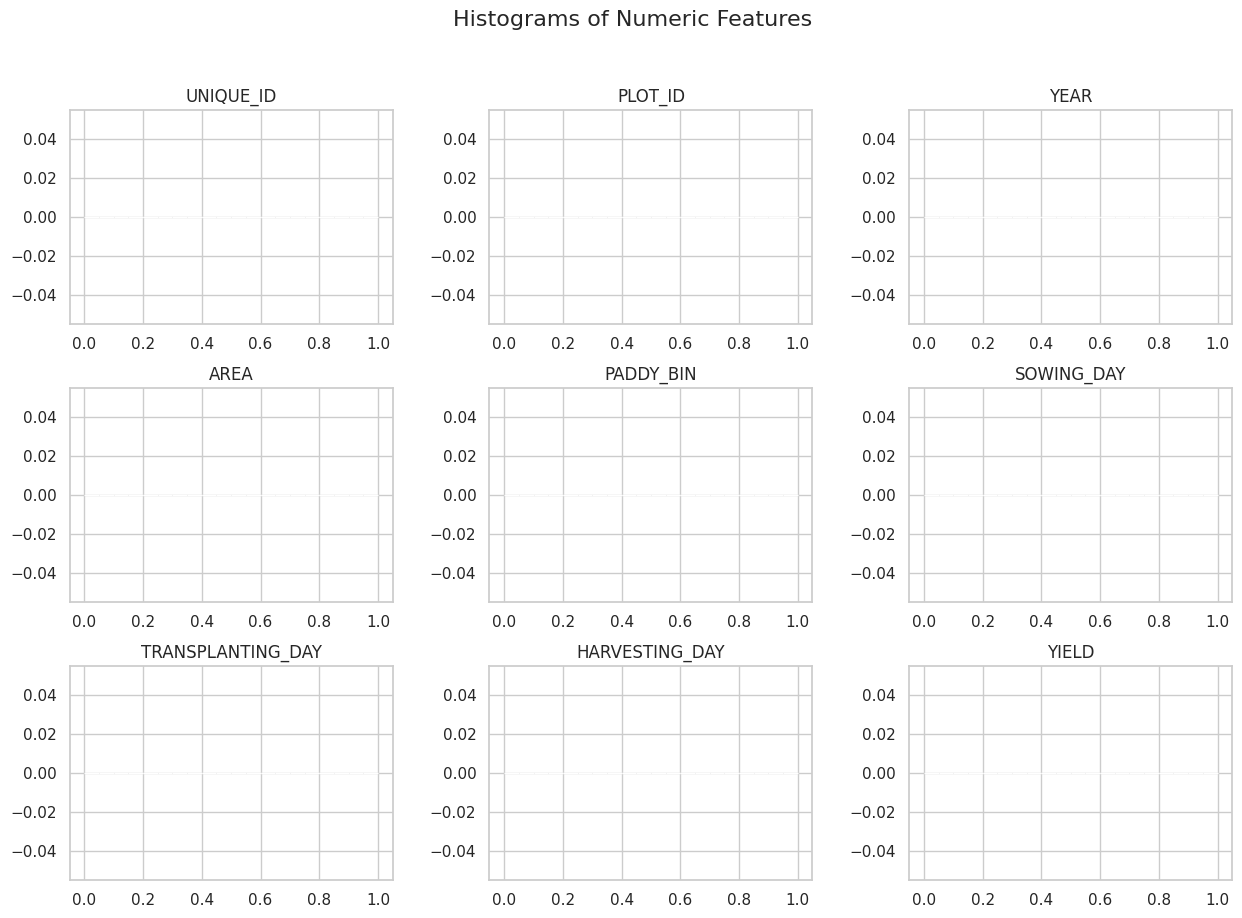

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

df[numeric_cols].hist(figsize=(15, 10), bins=20, color='skyblue')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

**Histograms** show the distribution of each feature:

For eg:

*   AREA:
Heavily right-skewed — most plots are under 1 acre, but a few go above 4.
*    SOWING_DAY, TRANSPLANTING_DAY, HARVESTING_DAY:
All are concentrated at low values, some with strange values (e.g., SOWING_DAY < 0).


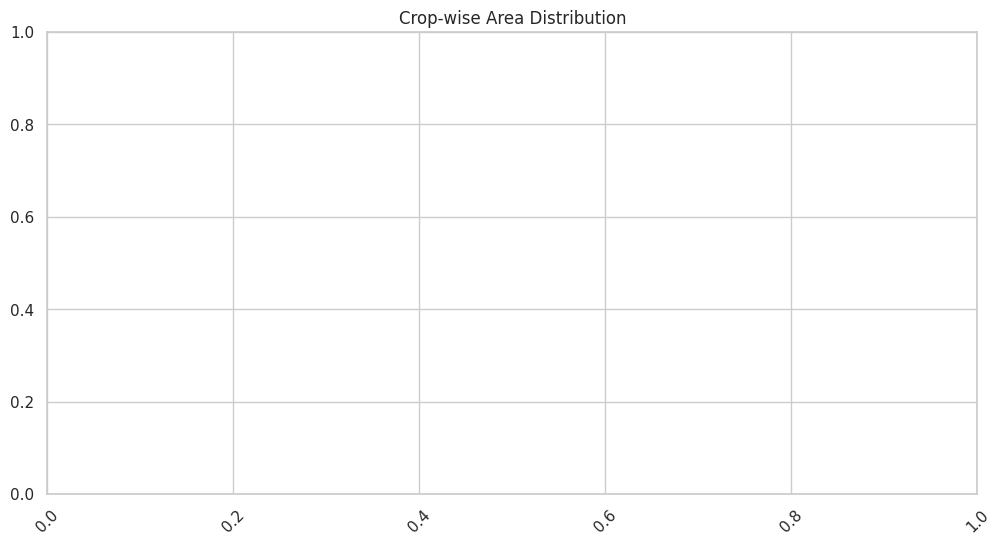

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='CROP', y='AREA')
plt.title("Crop-wise Area Distribution")
plt.xticks(rotation=45)
plt.show()

**Boxplot** shows how each crop differs in terms of feature values and whether that feature is useful for classification.

For eg:


*   Paddy shows a wide variation in area, with several plots above 1 acre — even up to 4 acres.

This suggests that Paddy is grown in both small and large farms, making AREA a potentially good distinguishing feature.

*   Most other crops like Banana, Groundnut, and Sesame are cultivated on much smaller and more consistent plot sizes.

Their box plots are narrow, with few or no outliers — indicating standardized or small-scale farming.

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


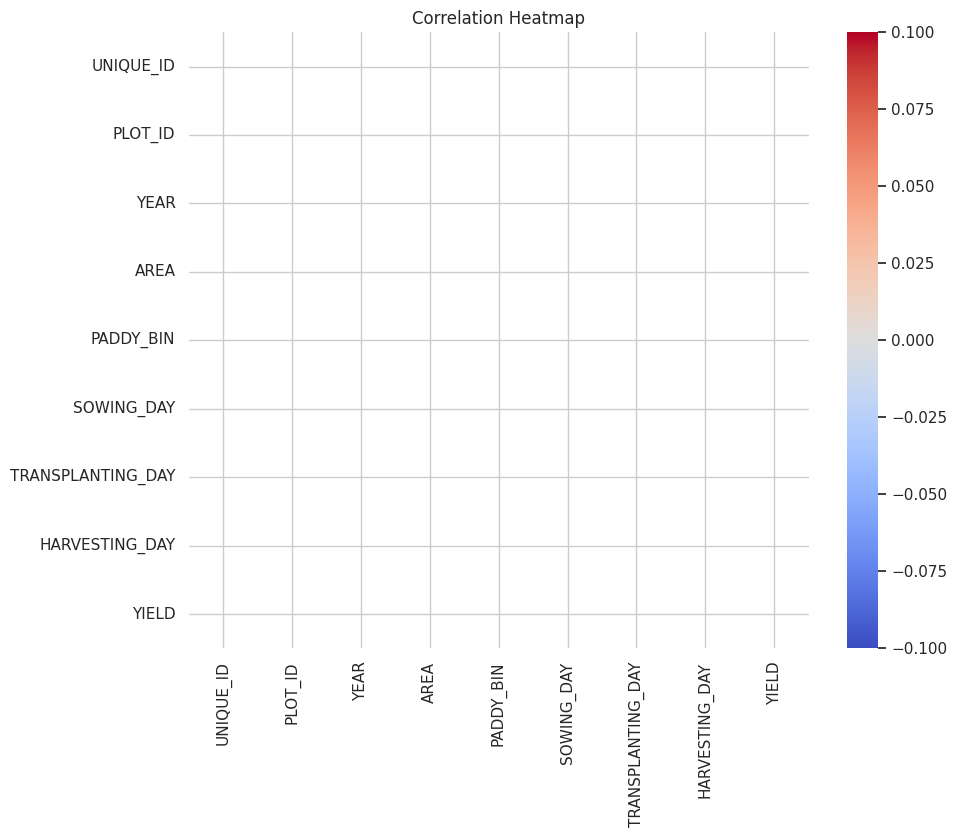

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Correlation heatmap helps identify which numeric features are strongly related (e.g., NDVI and AREA), or redundant.

If the value is close to:


*   -1  -- Negative relation(Value of both features decreases at similar rate)

For eg: TRANSPLANTING_DAY & YIELD

*   +1  -- Positive relation(Value of both features increase at similar rate)

For eg: PADDY_BIN & HARVESTING_DAY



# **FEATURE CORRELATION & SELECTION**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['crop_label'] = le.fit_transform(df['CROP'])

Machine learning algorithms require numerical targets. So, we convert each unique crop type into a numeric label.

So, now crop_label can be used as the target variable in our model.

In [ ]:
corr_with_target = df[numeric_features.columns].corrwith(df['crop_label']).abs()
corr_with_target.sort_values(ascending=False)

,0
UNIQUE_ID,NaN
PLOT_ID,NaN
YEAR,NaN
AREA,NaN
PADDY_BIN,NaN
SOWING_DAY,NaN
TRANSPLANTING_DAY,NaN
HARVESTING_DAY,NaN
YIELD,NaN


We use ***Pearson Correlation*** to identify which numeric features are most related to the crop type.

Features like PADDY_BIN, and HARVESTING_DAY show high correlation with the crop type and therefore, are good candidates for model input.

In [ ]:
def cramers_v(x, y):
    ...

cramers_v(df['RIVER_PART'], df['crop_label'])


***Cramér’s V*** is a correlation measure for categorical features. It helps to understand if variables like STANDARD_SEASON or RIVER_PART relate to crop type.

#**MODEL DEVELOPMENT**

In [ ]:
features = ['AREA', 'YEAR', 'YIELD', 'SOWING_DAY', 'PADDY_BIN']
X = df[features]
y = df['crop_label']

**FEATURE SELECTION**

We select the most relevant features to feed into our model, based on correlation and domain understanding.


By this we have clean, relevant feature matrix (X) and a numeric target (y).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.

**FEATURE STANDARDIZATION**

KNN is a distance-based algorithm — so if features are on different scales (e.g., AREA vs YEAR), the model will be biased. Standardization puts all features on the same scale.

In [ ]:
# Keep classes with at least 5 samples
class_counts = df['crop_label'].value_counts()
valid_classes = class_counts[class_counts >= 5].index

# Filter the dataset
df_filtered = df[df['crop_label'].isin(valid_classes)].copy()

# Reset features and target
X = df_filtered[features]
y = df_filtered['crop_label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


**TRAIN-TEST SPLIT**

To ensure proper model training and validation, crop classes with fewer than 5 samples are excluded. Very rare classes can mislead accuracy, break stratified sampling, and are not learnable by the model.

We divide our data into training and testing sets to evaluate model performance on unseen data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

errors = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Elbow Method")
plt.show()

**ELBOW METHOD**

The elbow method helps us find the best K where adding more neighbors doesn’t improve performance much.

Therefore, K value at the "elbow" point to use in the final model.

So, K = 3 is the best pick here as error is minimum at 3 and the error increases as K increases.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Training the final model using the optimal K value found from the elbow method(K=3).

# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
filtered_class_labels = le.inverse_transform(sorted(y_test.unique()))

print(classification_report(y_test, y_pred, target_names=filtered_class_labels))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**After filtering out rare crop classes, the number of remaining classes reduced.**

To correctly display the classification report, the labels are matched with the filtered class names using LabelEncoder.inverse_transform().


Classification metrics like Precision, Recall, and F1 Score give a more complete picture than just accuracy. The confusion matrix shows which classes the model confuses.